<a href="https://colab.research.google.com/github/IgorFR2/imersao-dados-desafio-final/blob/main/Notebooks/Projeto_Final_Alura_Imersao_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto final da "Imersão de Dados" da "Alura".
Este projeto visa completude do treinamento desta semana (02/05/2021 - 07/05/2021).

# Visão Geral
A amostra dada contém diversos tipos de mecanismos de ação (MOA's). Das informações fornecidas temos diversos componentes já classificados e suas influências na expressão de genes e células. Sendo assim, existe a possibilidade de criar um modelo capaz de classificar o MOA de uma substância por meio das alterações de expressões celulares. Para este fim foi escolhido o mecanismo "agonist".


## Objetivos:
Classificação de compostos com mecanismo de ação (MOA) **"agonist"**.

## Metodologia:
1. Contagem dos mecanismos de ação das drogas presentes no dataset.
2. Ajuste de estrutura de dados.
3. Criação de amostras de testes.
4. Testes com modelos apresentados em aula.
5. Discussão dos resultados

## Ferramentas e dados utilizados

### Bibliotecas usadas.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função de "grid" para plotagem de gráficos 
import matplotlib.gridspec as gridspec

# Biblioteca para plotagens estilizadas
import seaborn as sns

# Funções para criação de modelos de ML
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Funções auxiliares à geração de modelos
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score



### Dados fornecidos
* Os dados fornecidos estão divididos em 2 arquivos:
1. Um arquivo contendo o tratamento da amostra (aplicação direta de químico ou grupo control), compostos químicos(droga), tempo de análise, quantidade de doses, influência em cada gene (expressão gênica) e célula.
2. Um arquivo com os resultados empíricos da exposição das amostras celulares/gênicas aos compostos químicos, com tempo, doses e tratamento aplicado.
* Os valores das colunas de genes (g-1~771) representam a expressão gênica, isto é, o aumento ou diminuição (caso positivo ou negativo, respectivamente) na produção de proteínas dado um estímulo (droga/tratamento).
* As drogas podem ter resultado Agonista, Antagonista, Ativador, Inibidor entre outros.

In [56]:
dados = pd.read_csv('../Dados/dados_experimentos.zip', compression='zip')

In [57]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [58]:
dados_resultados = pd.read_csv('../Dados/dados_resultados.csv')

In [59]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adição de colunas "n_moa" e "ativo_moa".

In [60]:
dados_resultados['n_moa'] = dados_resultados.drop('id',axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = dados_resultados['n_moa'] != 0
dados_resultados

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


Contagem dos tipos de ações das drogas:

In [61]:
contagem_moa = dados_resultados.drop(['id', 'n_moa', 'ativo_moa'], axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [62]:
contagem_moa = contagem_moa.reset_index()
contagem_moa.rename(columns={'index':'MOAs',0: 'Contagem'}, inplace=True)

In [63]:
contagem_moa['sufixos'] = contagem_moa['MOAs'].apply(lambda x: x.split('_')[-1])
contagem_moa

,MOAs,Contagem,sufixos
0,nfkb_inhibitor,832,inhibitor
1,proteasome_inhibitor,726,inhibitor
2,cyclooxygenase_inhibitor,435,inhibitor
3,dopamine_receptor_antagonist,424,antagonist
4,serotonin_receptor_antagonist,404,antagonist
...,...,...,...
201,protein_phosphatase_inhibitor,6,inhibitor
202,autotaxin_inhibitor,6,inhibitor
203,diuretic,6,diuretic
204,erbb2_inhibitor,1,inhibitor


Inserindo novamente os id's para juntar os dados de resultados com o dataset.

In [64]:
contagem_moa['id'] = dados_resultados['id']
contagem_moa

,MOAs,Contagem,sufixos,id
0,nfkb_inhibitor,832,inhibitor,id_000644bb2
1,proteasome_inhibitor,726,inhibitor,id_000779bfc
2,cyclooxygenase_inhibitor,435,inhibitor,id_000a6266a
3,dopamine_receptor_antagonist,424,antagonist,id_0015fd391
4,serotonin_receptor_antagonist,404,antagonist,id_001626bd3
...,...,...,...,...
201,protein_phosphatase_inhibitor,6,inhibitor,id_022558d3e
202,autotaxin_inhibitor,6,inhibitor,id_0227c6599
203,diuretic,6,diuretic,id_02291b0ea
204,erbb2_inhibitor,1,inhibitor,id_022a1f85a


In [90]:
contagem_moa.set_index('id',inplace=True)
dados_expandidos = pd.merge(dados,contagem_moa, on='id')


In [125]:
dados_expandidos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,MOAs,Contagem,sufixos
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,nfkb_inhibitor,832,inhibitor
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,proteasome_inhibitor,726,inhibitor
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,cyclooxygenase_inhibitor,435,inhibitor
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,dopamine_receptor_antagonist,424,antagonist
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,serotonin_receptor_antagonist,404,antagonist


Os campos de "MOA's" e "Contagem" serviram de guia, para continuidade não serão mais úteis.
O foco é na coluna "sufixo", onde estão os tipos de "MOA" e, entre eles, o mecanismo alvo ('agonist').

In [127]:
dados_traduzidos = dados_expandidos.drop(['MOAs','Contagem'], axis=1)
dados_traduzidos.loc[(dados_traduzidos.sufixos != 'agonist'),'sufixos'] = 0
dados_traduzidos.loc[(dados_traduzidos.sufixos == 'agonist'),'sufixos'] = 1
dados_traduzidos

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,sufixos
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,id_022558d3e,com_droga,24,D1,244ef8123,-0.1167,-0.0873,0.3010,-1.0120,-0.0442,...,-0.4543,-0.4815,0.7162,-1.2940,-0.5594,-0.1227,0.2771,-1.1240,0.1109,0
202,id_0227c6599,com_droga,48,D1,6ff369788,0.8750,0.5430,-0.4560,0.3521,0.3816,...,-0.3833,-0.0756,-0.1453,-1.3820,0.0575,-0.6443,-0.8026,0.3803,0.0228,0
203,id_02291b0ea,com_droga,72,D2,a6c49d7e9,0.5769,0.9085,-2.2060,-0.1078,1.6250,...,0.2234,0.8954,-0.6332,0.4232,0.4644,-0.1194,0.1237,0.1624,-0.8697,0
204,id_022a1f85a,com_droga,24,D2,2159f4e19,-0.6205,-0.6656,-0.1998,0.5189,-0.7786,...,0.7379,0.0907,-0.0290,0.2492,-0.9132,-0.1704,0.5180,-0.2251,-0.3892,0


In [133]:
dados_traduzidos.sort_values(['sufixos'])
dados_traduzidos[dados_traduzidos.sufixos == 1].head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,sufixos
17,id_0031dd989,com_droga,24,D2,96b9ac123,-0.4764,-0.5513,1.8560,-0.2618,-0.3310,...,1.0620,0.3601,0.4402,0.2655,0.5741,0.8093,-0.0269,0.4259,0.9279,1
19,id_0036b0342,com_droga,48,D1,d14919a0e,-0.1428,-0.1957,-0.6397,0.0726,-0.8058,...,-0.1995,0.3496,0.3608,0.7261,-0.0030,0.2853,0.3129,0.4251,0.4308,1
22,id_003d4b6f0,com_droga,72,D1,b67df960c,0.6111,-0.2907,-0.7853,0.1947,-0.9804,...,0.5732,0.0289,0.1109,0.1208,0.5104,0.7287,-0.0168,-0.3555,-0.0509,1
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050,1
28,id_005c3cb48,com_droga,48,D1,1e83e8b52,0.1088,-0.0945,-0.0345,-0.0853,-0.6953,...,-0.2518,0.2619,-0.1159,0.0052,0.5781,-0.2392,0.9806,0.2554,0.3550,1


In [140]:
dados_traduzidos['24'] = (dados['tempo'] == 24).astype(int)
dados_traduzidos['48'] = (dados['tempo'] == 48).astype(int)
dados_traduzidos['72'] = (dados['tempo'] == 72).astype(int)
dados_traduzidos = dados_traduzidos.drop(['tempo'], axis=1)
dados_traduzidos.head()

,id,tratamento,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,...,c-94,c-95,c-96,c-97,c-98,c-99,sufixos,24,48,72
0,id_000644bb2,com_droga,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,1,0,0
1,id_000779bfc,com_droga,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,0,1
2,id_000a6266a,com_droga,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0
3,id_0015fd391,com_droga,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0
4,id_001626bd3,com_droga,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,0,1


In [153]:
# Selecionanco a expressão genica e a viabilidade celular para treinar o modelo: x
x = dados_traduzidos.select_dtypes('float64')
# Selecionar a saida esperada: y
y = dados_traduzidos.sufixos.astype(int)

# Random state é como uma "seed" que gera um resultado fixo. Assim posso reproduzir resultados, como no da aula.
# Stratify servirá para garantir a proporção das colunas "verdadeiro" e "falso" (neste caso na variável y). Na documentação não explica muito bem.
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2359)


In [154]:
# Criar modelo para treinar com X e comparar com Y
modelo_rlogistica = LogisticRegression(max_iter=1000)

In [155]:
modelo_rlogistica.fit(x_treino,y_treino)

LogisticRegression(max_iter=1000)

In [156]:
modelo_rlogistica.score(x_teste,y_teste)

0.8571428571428571

O resultado com regressão logística não foi tão satisfatório.

In [158]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino,y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.8571428571428571

In [165]:
modelo_arvore = DecisionTreeClassifier(max_depth = 30)
modelo_arvore.fit(x_treino,y_treino)
modelo_arvore.score(x_teste,y_teste)

0.8095238095238095

In [173]:
teste=[]
treino=[]
for i in range(1,15):
  modelo_arvore = DecisionTreeClassifier(max_depth = i)
  modelo_arvore.fit(x_treino,y_treino)
  teste.append(modelo_arvore.score(x_teste,y_teste))
  treino.append(modelo_arvore.score(x_treino,y_treino))

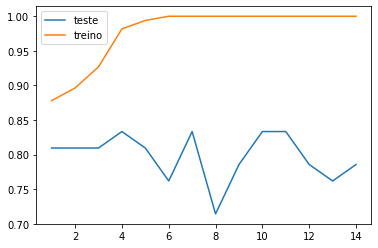

In [212]:
sns.lineplot(x=range(1,15), y=teste, label='teste')
sns.lineplot(x=range(1,15), y=treino, label='treino')
plt.show()

In [206]:
from sklearn.linear_model import SGDClassifier
modelo_sgd = SGDClassifier(loss="modified_huber", penalty="l1",max_iter=30)
modelo_sgd.fit(x_treino,y_treino)
modelo_sgd.score(x_teste,y_teste)

0.8095238095238095

In [187]:
modelo_sgd.score(x_teste,y_teste)

0.8095238095238095

# Referências 
## Artigos
* Artigo sobre histogramas: https://www.alura.com.br/artigos/o-que-e-um-histograma?utm_source=gnarus&utm_medium=timeline
* Artigo sobre visualização de Boxplot e Candlestick: https://www.monolitonimbus.com.br/graficos-boxplot-e-candlestick/
## Documentação e Sites
* Exemplos de Grid: https://www.python-course.eu/matplotlib_gridspec.php
* Documentação do comando "merge": https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Documentação Sklearn regressão linear: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* Documentação Sklearn DecisionTreeClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* Documentação Sklearn RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Documentação Sklearn DummyClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
* Documentação Sklearn accuracy_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
## Vídeos
* Vídeo sobre boxplot (Portal da Matemática OBMEP): https://www.youtube.com/watch?v=S6x__fjofxM